In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

In [2]:
#importing data from the url
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm','Species']
iris_df = pd.read_csv(url,header=None, names = column_names)

print(iris_df.head()) #display the first few data

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
#data inspection
print(iris_df.info()) #display data information
print(iris_df.describe()) #print descriptive statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.90000

In [4]:
#data cleansing
print(iris_df.isnull().sum()) #missing values

duplicates = iris_df.duplicated() #check for duplicated rows
print(f"Number of duplicate row: {duplicates.sum()}")

iris_df.drop_duplicates(inplace = True) # remove duplicated rows

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Number of duplicate row: 3


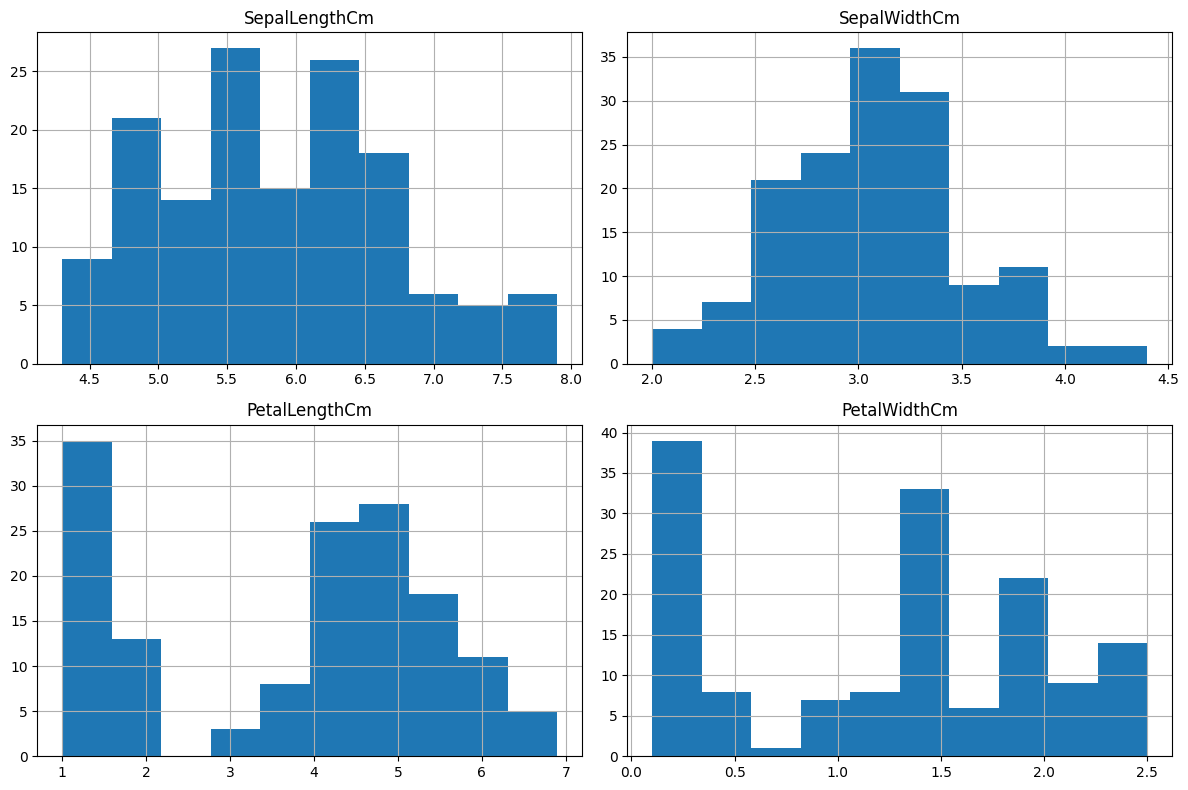

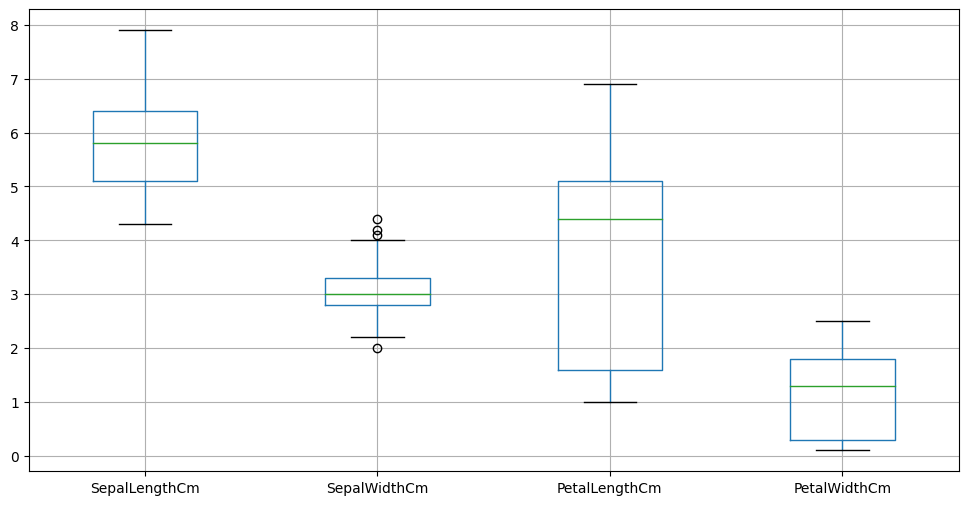

In [5]:
#Univariate analysis
# Histograms

iris_df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplots
iris_df.boxplot(figsize=(12, 6))
plt.show()

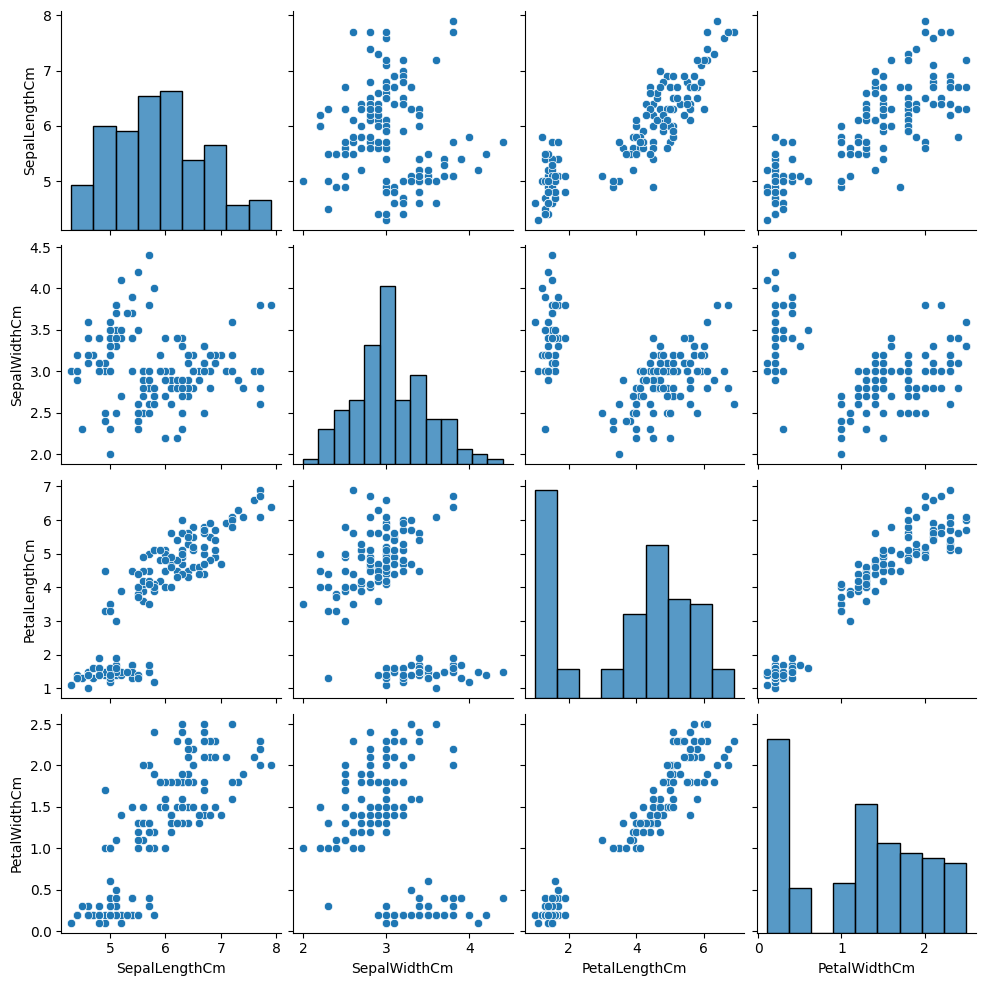

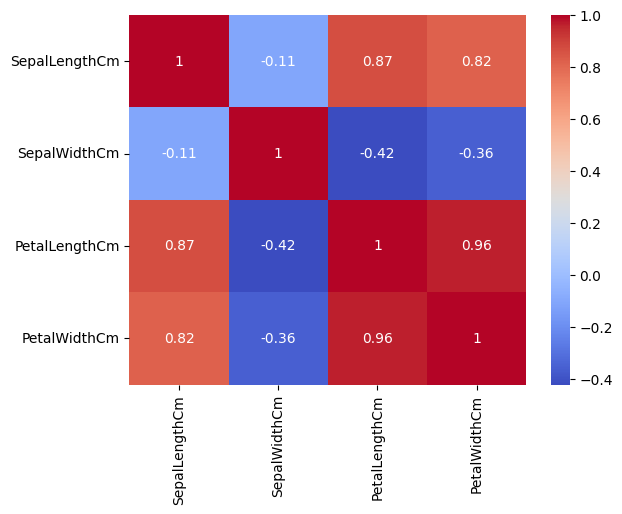

In [9]:
# Scatter plots
sns.pairplot(iris_df, vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'])
plt.show()

#Correlation heatmap
# Select only numerical columns for correlation calculation
numerical_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
correlation = iris_df[numerical_columns].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

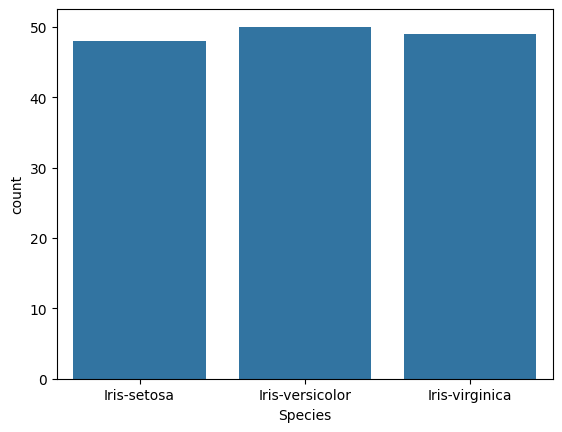

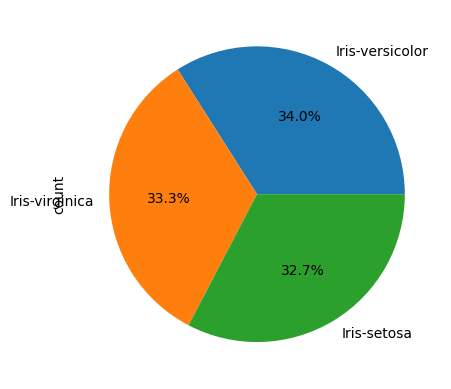

In [11]:
# Bar plot
sns.countplot(x='Species', data=iris_df) # Capitalize 'species' to 'Species'
plt.show()

# Pie chart
iris_df['Species'].value_counts().plot(kind='pie', autopct='%1.1f%%') # Capitalize 'species' to 'Species'
plt.show()

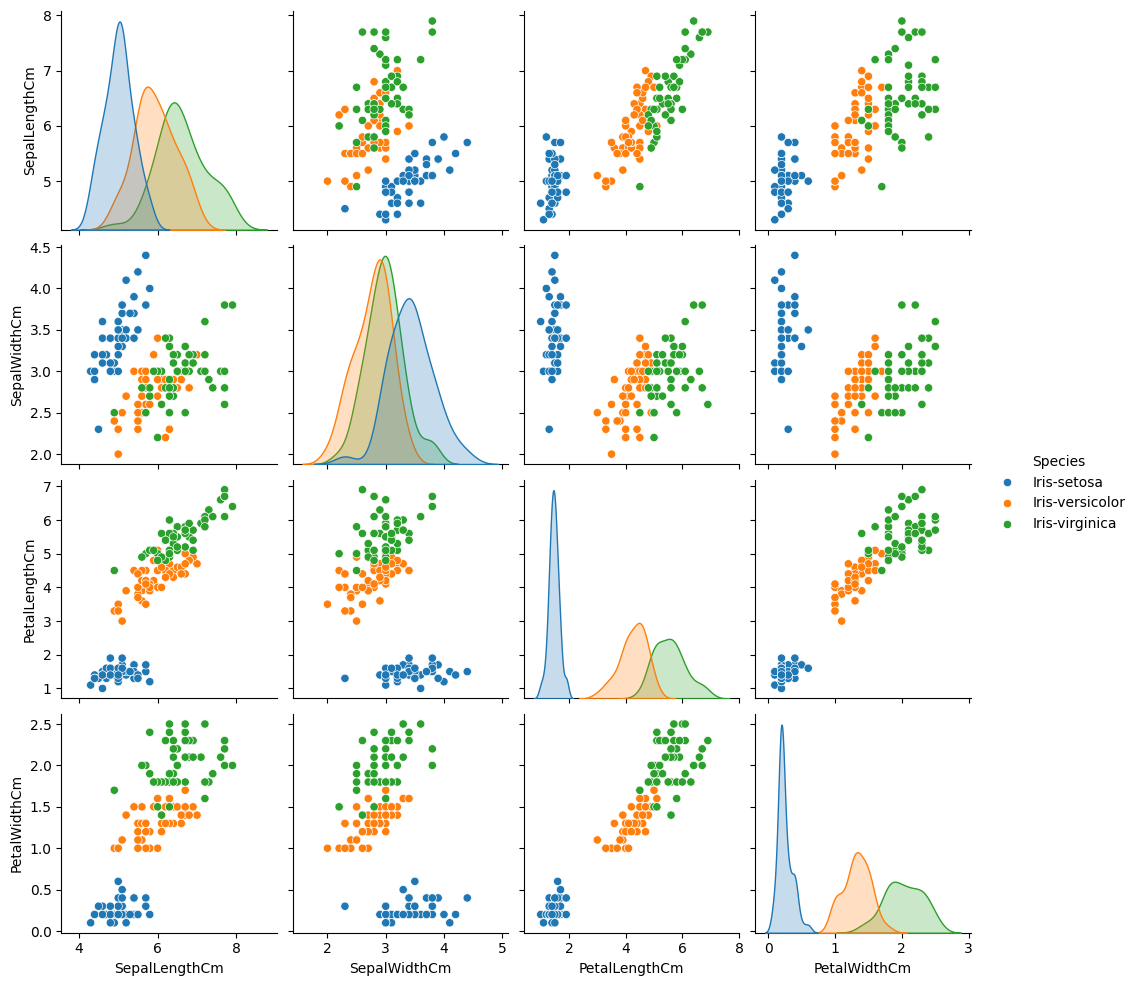

In [13]:
sns.pairplot(iris_df, hue='Species')
plt.show()

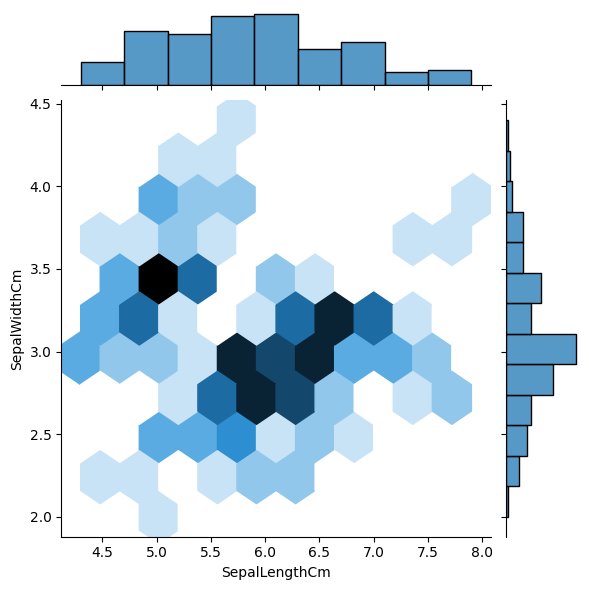

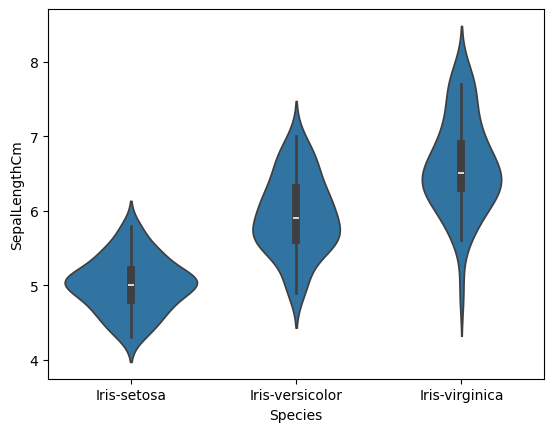

In [14]:
# Joint plot
sns.jointplot(x= 'SepalLengthCm', y='SepalWidthCm', data=iris_df, kind='hex')
plt.show()

# Violin plot
sns.violinplot(x='Species', y='SepalLengthCm', data=iris_df)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

# Create preprocessing steps
numeric_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
numeric_transformer = StandardScaler()

categorical_features = ['Species']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_transformed = preprocessor.fit_transform(iris_df)

# Create a new DataFrame with transformed data
feature_names = numeric_features + [f'Species_{s}' for s in iris_df['Species'].unique()[1:]]
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

print(X_transformed_df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      -0.915509      1.019971      -1.357737       -1.3357   
1      -1.157560     -0.128082      -1.357737       -1.3357   
2      -1.399610      0.331139      -1.414778       -1.3357   
3      -1.520635      0.101529      -1.300696       -1.3357   
4      -1.036535      1.249582      -1.357737       -1.3357   

   Species_Iris-versicolor  Species_Iris-virginica  
0                      0.0                     0.0  
1                      0.0                     0.0  
2                      0.0                     0.0  
3                      0.0                     0.0  
4                      0.0                     0.0  


In [18]:
# Combine transformed features with original species column
final_df = pd.concat([X_transformed_df, iris_df['Species']], axis=1)

# Save to CSV
final_df.to_csv('processed_iris_data.csv', index=False)
print("Processed data saved to 'processed_iris_data.csv'")

Processed data saved to 'processed_iris_data.csv'
